In [66]:
import numpy as npb
import matplotlib
import pandas as pd
import seaborn as sns

## We are going to use a tab separated value file, because a csv will mess up the whole algorithm, as commas exist between reviews. Tab usage between reviews are impossible, because a new tab within reviews will take the control to the next button. Even double quotes in csv will be a problem. 

In [2]:
pwd

'/Users/sunandakumarghosh/Desktop/My Analytics Project/Kaggle/Others'

In [3]:
# remove unwanted double or single quotes from the input texts

In [4]:
dataset = pd.read_csv('/Users/sunandakumarghosh/Desktop/My Analytics Project/Kaggle/Restaurant_Reviews.tsv', delimiter='\t', quoting=3)  

In [5]:
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [6]:
dataset.info

<bound method DataFrame.info of                                                 Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]>

In [10]:
dataset.isnull().sum()

Review    0
Liked     0
dtype: int64

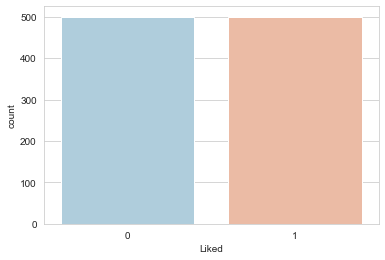

In [67]:
sns.set_style('whitegrid')
sns.countplot(x='Liked', data=dataset, palette='RdBu_r')

## A super balanced data here we have. A great accuracy is expected.

## Clean the text.

1. Remove punctuations.
2. Remove capitals of all texts.
3. Remove numbers.
4. Remove stop words.
5. Perform stemming - Loved, loving, combine to a single root word - love. Reduce sparse matrix.

In [12]:
!pip install regex

In [13]:
import regex

In [31]:
dataset['Review'][0]

'Wow... Loved this place.'

Removing numbers and punctuation marks. We specifiy in sub what we dont wanna remove. We put space to not create gibberish word upon removing punctuations.

In [32]:
review_clean = regex.sub('[^a-zA-Z]', ' ', dataset['Review'][0])

In [33]:
review_clean 

'Wow    Loved this place '

To lowercase.

In [34]:
review_clean_lower = review_clean.lower()

In [35]:
review_clean_lower

'wow    loved this place '

Removing stop words.

In [19]:
!pip install nltk

In [21]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sunandakumarghosh/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [1]:
nltk.download('punkt')

<IPython.core.display.Javascript object>

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sunandakumarghosh/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('all-corpora')

In [2]:
nltk.download()

<IPython.core.display.Javascript object>

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [3]:
!pip install spacey

## Review_clean_lower will become a list of several splitted words.

In [36]:
review_clean_lower_list = review_clean_lower.split()

In [37]:
review_clean_lower_list

['wow', 'loved', 'this', 'place']

## A list comprehension is used below to find out words from 'review_clean_lower' which are not present in stopwords.

In [38]:
from nltk.corpus import stopwords

## We used set infront of stopwords because a set performs much faster than a list. Comes handy when dealing with huge articles and paragraphs. 

A set is an unordered collection data type that is iterable, mutable, and has no duplicate elements. Python's set of class represents the mathematical notion of set. This is based on a data structure known as a hash table.

In [39]:
review_clean_lower_stop = [word for word in review_clean_lower_list if not word in set(stopwords.words('english'))]

In [40]:
review_clean_lower_stop

['wow', 'loved', 'place']

# Perform stemming.

In [49]:
from nltk.stem.porter import PorterStemmer

In [55]:
ps = PorterStemmer()

In [59]:
review_clean_lower_list

['wow', 'loved', 'this', 'place']

After stemming, loved -> love

In [60]:
review_clean_lower_stop_stem = [ps.stem(word) for word in review_clean_lower_list if not word in set(stopwords.words('english'))]

In [61]:
review_clean_lower_stop_stem

['wow', 'love', 'place']

## Converting list elements back to string separated by a space.

In [62]:
review_clean_lower_stop_stem_joined = ' '.join(review_clean_lower_stop_stem)

In [63]:
review_clean_lower_stop_stem_joined

'wow love place'

# Cleaning completed. Now lets apply the cleaning procedures to the entire dataset of reviews.

In [64]:
corpus =[]

for i in range(0,1000):
    review_corpus = regex.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
    review_corpus = review_corpus.lower()
    review_corpus = review_corpus.split()
    review_corpus = [ps.stem(word) for word in review_corpus if not word in set(stopwords.words('english'))]
    review_corpus = ' '.join(review_corpus)
    corpus.append(review_corpus)

In [65]:
corpus

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place acc

# Remove the rarely occuring words and irrelevant words. Create Bag of words model. Have only the unique words, remove duplicates. Sparse matrix and reduce sparsity.

In [68]:
from sklearn.feature_extraction.text import CountVectorizer

In [92]:
cv = CountVectorizer(max_features=1000)

## Creation of sparse matrix.

In [93]:
X = cv.fit_transform(corpus).toarray()

In [94]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## Remove irrelevant words like Rick and Steve from Sparse matrix. Also find the top 100 frequently occuring words using max_features of CountVectorizer.

In [95]:
X.shape

(1000, 1000)

In [96]:
Y = dataset.iloc[:,1].values #.values is to convert into an array.

In [97]:
Y

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,

In [98]:
Y.shape

(1000,)

## We can reduce sparsity in two ways. One by decreasing the max_features value in CountVectorizer or by applying dimension reduction techniques like PCA or LDA.


## Here we will use the most common NLP machine learning models such as Naive Bayes, Decision Tree and Random Forest classification.

===================================================================================================================================================================

# Krish Naik's NLP.

In [1]:
import nltk

In [2]:
paragraph = """I have three visions for India. In 3000 years of our history, people from all over 
               the world have come and invaded us, captured our lands, conquered our minds. 
               From Alexander onwards, the Greeks, the Turks, the Moguls, the Portuguese, the British,
               the French, the Dutch, all of them came and looted us, took over what was ours. 
               Yet we have not done this to any other nation. We have not conquered anyone. 
               We have not grabbed their land, their culture, 
               their history and tried to enforce our way of life on them. 
               Why? Because we respect the freedom of others.That is why my 
               first vision is that of freedom. I believe that India got its first vision of 
               this in 1857, when we started the War of Independence. It is this freedom that
               we must protect and nurture and build on. If we are not free, no one will respect us.
               My second vision for India’s development. For fifty years we have been a developing nation.
               It is time we see ourselves as a developed nation. We are among the top 5 nations of the world
               in terms of GDP. We have a 10 percent growth rate in most areas. Our poverty levels are falling.
               Our achievements are being globally recognised today. Yet we lack the self-confidence to
               see ourselves as a developed nation, self-reliant and self-assured. Isn’t this incorrect?
               I have a third vision. India must stand up to the world. Because I believe that unless India 
               stands up to the world, no one will respect us. Only strength respects strength. We must be 
               strong not only as a military power but also as an economic power. Both must go hand-in-hand. 
               My good fortune was to have worked with three great minds. Dr. Vikram Sarabhai of the Dept. of 
               space, Professor Satish Dhawan, who succeeded him and Dr. Brahm Prakash, father of nuclear material.
               I was lucky to have worked with all three of them closely and consider this the great opportunity of my life. 
               I see four milestones in my career"""

In [3]:
# Tokenizing sentences
sentences = nltk.sent_tokenize(paragraph)

In [4]:
type(sentences)

list

In [5]:
len(sentences)

31

In [6]:
sentences

['I have three visions for India.',
 'In 3000 years of our history, people from all over \n               the world have come and invaded us, captured our lands, conquered our minds.',
 'From Alexander onwards, the Greeks, the Turks, the Moguls, the Portuguese, the British,\n               the French, the Dutch, all of them came and looted us, took over what was ours.',
 'Yet we have not done this to any other nation.',
 'We have not conquered anyone.',
 'We have not grabbed their land, their culture, \n               their history and tried to enforce our way of life on them.',
 'Why?',
 'Because we respect the freedom of others.That is why my \n               first vision is that of freedom.',
 'I believe that India got its first vision of \n               this in 1857, when we started the War of Independence.',
 'It is this freedom that\n               we must protect and nurture and build on.',
 'If we are not free, no one will respect us.',
 'My second vision for India’s developme

In [7]:
# Tokenizing words
words = nltk.word_tokenize(paragraph)

In [8]:
words

['I',
 'have',
 'three',
 'visions',
 'for',
 'India',
 '.',
 'In',
 '3000',
 'years',
 'of',
 'our',
 'history',
 ',',
 'people',
 'from',
 'all',
 'over',
 'the',
 'world',
 'have',
 'come',
 'and',
 'invaded',
 'us',
 ',',
 'captured',
 'our',
 'lands',
 ',',
 'conquered',
 'our',
 'minds',
 '.',
 'From',
 'Alexander',
 'onwards',
 ',',
 'the',
 'Greeks',
 ',',
 'the',
 'Turks',
 ',',
 'the',
 'Moguls',
 ',',
 'the',
 'Portuguese',
 ',',
 'the',
 'British',
 ',',
 'the',
 'French',
 ',',
 'the',
 'Dutch',
 ',',
 'all',
 'of',
 'them',
 'came',
 'and',
 'looted',
 'us',
 ',',
 'took',
 'over',
 'what',
 'was',
 'ours',
 '.',
 'Yet',
 'we',
 'have',
 'not',
 'done',
 'this',
 'to',
 'any',
 'other',
 'nation',
 '.',
 'We',
 'have',
 'not',
 'conquered',
 'anyone',
 '.',
 'We',
 'have',
 'not',
 'grabbed',
 'their',
 'land',
 ',',
 'their',
 'culture',
 ',',
 'their',
 'history',
 'and',
 'tried',
 'to',
 'enforce',
 'our',
 'way',
 'of',
 'life',
 'on',
 'them',
 '.',
 'Why',
 '?',
 '

In [8]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [9]:
stopwords.words('dutch')

['de',
 'en',
 'van',
 'ik',
 'te',
 'dat',
 'die',
 'in',
 'een',
 'hij',
 'het',
 'niet',
 'zijn',
 'is',
 'was',
 'op',
 'aan',
 'met',
 'als',
 'voor',
 'had',
 'er',
 'maar',
 'om',
 'hem',
 'dan',
 'zou',
 'of',
 'wat',
 'mijn',
 'men',
 'dit',
 'zo',
 'door',
 'over',
 'ze',
 'zich',
 'bij',
 'ook',
 'tot',
 'je',
 'mij',
 'uit',
 'der',
 'daar',
 'haar',
 'naar',
 'heb',
 'hoe',
 'heeft',
 'hebben',
 'deze',
 'u',
 'want',
 'nog',
 'zal',
 'me',
 'zij',
 'nu',
 'ge',
 'geen',
 'omdat',
 'iets',
 'worden',
 'toch',
 'al',
 'waren',
 'veel',
 'meer',
 'doen',
 'toen',
 'moet',
 'ben',
 'zonder',
 'kan',
 'hun',
 'dus',
 'alles',
 'onder',
 'ja',
 'eens',
 'hier',
 'wie',
 'werd',
 'altijd',
 'doch',
 'wordt',
 'wezen',
 'kunnen',
 'ons',
 'zelf',
 'tegen',
 'na',
 'reeds',
 'wil',
 'kon',
 'niets',
 'uw',
 'iemand',
 'geweest',
 'andere']

# Stemming

In [9]:
from nltk.stem import PorterStemmer  # For stemming
from nltk.stem import WordNetLemmatizer  # For Lemmatization.
from nltk.corpus import stopwords

In [13]:
sentences_stem = nltk.sent_tokenize(paragraph)

In [14]:
sentences_stem

['I have three visions for India.',
 'In 3000 years of our history, people from all over \n               the world have come and invaded us, captured our lands, conquered our minds.',
 'From Alexander onwards, the Greeks, the Turks, the Moguls, the Portuguese, the British,\n               the French, the Dutch, all of them came and looted us, took over what was ours.',
 'Yet we have not done this to any other nation.',
 'We have not conquered anyone.',
 'We have not grabbed their land, their culture, \n               their history and tried to enforce our way of life on them.',
 'Why?',
 'Because we respect the freedom of others.That is why my \n               first vision is that of freedom.',
 'I believe that India got its first vision of \n               this in 1857, when we started the War of Independence.',
 'It is this freedom that\n               we must protect and nurture and build on.',
 'If we are not free, no one will respect us.',
 'My second vision for India’s developme

In [30]:
sentences = nltk.sent_tokenize(paragraph)
ps = PorterStemmer()

In [26]:
for i in range(len(sentences)):
    words=nltk.word_tokenize(sentences[i])    # List of words from each sentence.
    words=[ps.stem(word) for word in words if not word in set(stopwords.words('english'))]    # List comprehension
    sentences[i]= ' '.join(words)

## Stemming Done.

In [27]:
sentences

['I three vision india .',
 'In 3000 year histori , peopl world come invad us , captur land , conquer mind .',
 'from alexand onward , greek , turk , mogul , portugues , british , french , dutch , came loot us , took .',
 'yet done nation .',
 'We conquer anyon .',
 'We grab land , cultur , histori tri enforc way life .',
 'whi ?',
 'becaus respect freedom others.that first vision freedom .',
 'I believ india got first vision 1857 , start war independ .',
 'It freedom must protect nurtur build .',
 'If free , one respect us .',
 'My second vision india ’ develop .',
 'for fifti year develop nation .',
 'It time see develop nation .',
 'We among top 5 nation world term gdp .',
 'We 10 percent growth rate area .',
 'our poverti level fall .',
 'our achiev global recognis today .',
 'yet lack self-confid see develop nation , self-reli self-assur .',
 'isn ’ incorrect ?',
 'I third vision .',
 'india must stand world .',
 'becaus I believ unless india stand world , one respect us .',
 'onl

## Lets perform lemmatization.

In [12]:
lemmatizer = WordNetLemmatizer()

In [11]:
sentences = nltk.sent_tokenize(paragraph)

In [13]:
sentences

['I have three visions for India.',
 'In 3000 years of our history, people from all over \n               the world have come and invaded us, captured our lands, conquered our minds.',
 'From Alexander onwards, the Greeks, the Turks, the Moguls, the Portuguese, the British,\n               the French, the Dutch, all of them came and looted us, took over what was ours.',
 'Yet we have not done this to any other nation.',
 'We have not conquered anyone.',
 'We have not grabbed their land, their culture, \n               their history and tried to enforce our way of life on them.',
 'Why?',
 'Because we respect the freedom of others.That is why my \n               first vision is that of freedom.',
 'I believe that India got its first vision of \n               this in 1857, when we started the War of Independence.',
 'It is this freedom that\n               we must protect and nurture and build on.',
 'If we are not free, no one will respect us.',
 'My second vision for India’s developme

In [31]:
sentences_lemmatized = []

for i in range(len(sentences)):
    words=nltk.word_tokenize(sentences[i])    # List of words from each sentence.
    words=[lemmatizer.lemmatize(word) for word in words if not word in set(stopwords.words('english'))]    # List comprehension
    words= ' '.join(words)
    sentences_lemmatized.append(words)

In [32]:
sentences_lemmatized

['I three vision India .',
 'In 3000 year history , people world come invaded u , captured land , conquered mind .',
 'From Alexander onwards , Greeks , Turks , Moguls , Portuguese , British , French , Dutch , came looted u , took .',
 'Yet done nation .',
 'We conquered anyone .',
 'We grabbed land , culture , history tried enforce way life .',
 'Why ?',
 'Because respect freedom others.That first vision freedom .',
 'I believe India got first vision 1857 , started War Independence .',
 'It freedom must protect nurture build .',
 'If free , one respect u .',
 'My second vision India ’ development .',
 'For fifty year developing nation .',
 'It time see developed nation .',
 'We among top 5 nation world term GDP .',
 'We 10 percent growth rate area .',
 'Our poverty level falling .',
 'Our achievement globally recognised today .',
 'Yet lack self-confidence see developed nation , self-reliant self-assured .',
 'Isn ’ incorrect ?',
 'I third vision .',
 'India must stand world .',
 'Bec

## Term Frequency Inverse document Frequency Vectorizer

In [14]:
lemmatizer = WordNetLemmatizer()

In [ ]:
sentences = nltk.sent_tokenize(paragraph)

In [ ]:
sentences

In [17]:
corpus = []
import regex

for i in range(len(sentences)):
    review_corpus = regex.sub('[^a-zA-Z]', ' ', sentences[i])
    review_corpus = review_corpus.lower()
    review_corpus = review_corpus.split()
    review_corpus = [lemmatizer.lemmatize(word) for word in review_corpus if not word in set(stopwords.words('english'))]
    review_corpus = ' '.join(review_corpus)
    corpus.append(review_corpus)
corpus

['three vision india',
 'year history people world come invaded u captured land conquered mind',
 'alexander onwards greek turk mogul portuguese british french dutch came looted u took',
 'yet done nation',
 'conquered anyone',
 'grabbed land culture history tried enforce way life',
 '',
 'respect freedom others first vision freedom',
 'believe india got first vision started war independence',
 'freedom must protect nurture build',
 'free one respect u',
 'second vision india development',
 'fifty year developing nation',
 'time see developed nation',
 'among top nation world term gdp',
 'percent growth rate area',
 'poverty level falling',
 'achievement globally recognised today',
 'yet lack self confidence see developed nation self reliant self assured',
 'incorrect',
 'third vision',
 'india must stand world',
 'believe unless india stand world one respect u',
 'strength respect strength',
 'must strong military power also economic power',
 'must go hand hand',
 'good fortune worked

## Creating the Tf-IDF vectorizer.

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf=TfidfVectorizer()
X = tf_idf.fit_transform(corpus).toarray()

In [19]:
X

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.25883507, 0.30512561,
        0.        ],
       [0.        , 0.28867513, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [20]:
X.shape

(31, 114)

===================================================================================================================================================================

# Implementing a Spam classifier in python| Natural Language Processing

In [6]:
import regex
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import nltk

In [2]:
pwd  

'/Users/sunandakumarghosh/Desktop/My Analytics Project/Kaggle'

In [4]:
messages=pd.read_csv('/Users/sunandakumarghosh/Desktop/My Analytics Project/Kaggle/SpamClassifier-master/smsspamcollection/SMSSpamCollection.csv',sep='\t',names=['Label', 'Messages'])

In [5]:
messages

,Label,Messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
messages.info

<bound method DataFrame.info of      Label                                           Messages
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham               Will ü b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [8]:
messages[messages['Label']=='ham']

,Label,Messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
6,ham,Even my brother is not like to speak with me. ...
...,...,...
5565,ham,Huh y lei...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:
messages[messages['Label']=='spam']

,Label,Messages
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...


In [10]:
messages.isnull().sum()

Label       0
Messages    0
dtype: int64

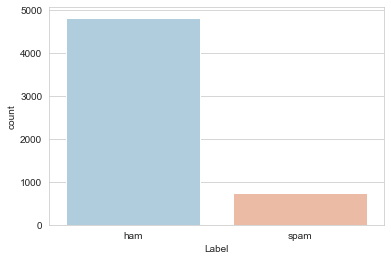

In [15]:
sns.set_style('whitegrid')
sns.countplot(x='Label',data=messages,palette='RdBu_r')

In [17]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()

In [18]:
corpus_spam =[]

for i in range(0,len(messages)):
    review_corpus = regex.sub('[^a-zA-Z]', ' ', messages['Messages'][i])
    review_corpus = review_corpus.lower()
    review_corpus = review_corpus.split()
    review_corpus = [ps.stem(word) for word in review_corpus if not word in set(stopwords.words('english'))]
    review_corpus = ' '.join(review_corpus)
    corpus_spam.append(review_corpus)

In [19]:
corpus_spam

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',
 'search right word thank breather

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=4500)
X = cv.fit_transform(corpus_spam).toarray()

In [22]:
X.shape

(5572, 4500)

In [23]:
Y=pd.get_dummies(messages['Label'])

In [24]:
Y

,ham,spam
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0
...,...,...
5567,0,1
5568,1,0
5569,1,0
5570,1,0


In [25]:
Y=Y.iloc[:,1].values

In [26]:
Y

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [28]:
## Implementing Naive bayes.

In [32]:
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()
spam_detect_model = NB.fit(X_train, Y_train) 

In [33]:
y_pred = spam_detect_model.predict(X_test)

In [40]:
import pylab as pl
from sklearn.metrics import confusion_matrix

In [36]:
confusion_m = confusion_matrix(Y_test,y_pred)

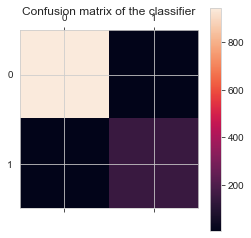

In [41]:
pl.matshow(confusion_m)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()

In [42]:
confusion_m

array([[946,   9],
       [  7, 153]])

In [37]:
from sklearn.metrics import accuracy_score

In [43]:
accuracy = accuracy_score(Y_test, y_pred)

In [44]:
accuracy

0.9856502242152466

In [45]:
from sklearn.metrics import precision_recall_fscore_support

In [46]:
prf=precision_recall_fscore_support(Y_test, y_pred, average='macro')

In [47]:
prf

(0.9685496094205432, 0.9734129581151832, 0.9709624073857052, None)

In [52]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

## What is the difference between binary and micro??

In [51]:
# calculate prediction
precision = precision_score(Y_test, y_pred, average='binary')
print('Precision: %.3f' % precision)

Precision: 0.944


In [53]:
# calculate recall
recall = recall_score(Y_test, y_pred, average='binary')
print('Recall: %.3f' % recall)

Recall: 0.956


# Word2Vec

In [1]:
import regex
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import nltk

In [2]:
from nltk.corpus import stopwords
from gensim.models import Word2Vec

unable to import 'smart_open.gcs', disabling that module


In [3]:
!pip install gensim

In [4]:
paragraph = """I have three visions for India. In 3000 years of our history, people from all over 
               the world have come and invaded us, captured our lands, conquered our minds. 
               From Alexander onwards, the Greeks, the Turks, the Moguls, the Portuguese, the British,
               the French, the Dutch, all of them came and looted us, took over what was ours. 
               Yet we have not done this to any other nation. We have not conquered anyone. 
               We have not grabbed their land, their culture, 
               their history and tried to enforce our way of life on them. 
               Why? Because we respect the freedom of others.That is why my 
               first vision is that of freedom. I believe that India got its first vision of 
               this in 1857, when we started the War of Independence. It is this freedom that
               we must protect and nurture and build on. If we are not free, no one will respect us.
               My second vision for India’s development. For fifty years we have been a developing nation.
               It is time we see ourselves as a developed nation. We are among the top 5 nations of the world
               in terms of GDP. We have a 10 percent growth rate in most areas. Our poverty levels are falling.
               Our achievements are being globally recognised today. Yet we lack the self-confidence to
               see ourselves as a developed nation, self-reliant and self-assured. Isn’t this incorrect?
               I have a third vision. India must stand up to the world. Because I believe that unless India 
               stands up to the world, no one will respect us. Only strength respects strength. We must be 
               strong not only as a military power but also as an economic power. Both must go hand-in-hand. 
               My good fortune was to have worked with three great minds. Dr. Vikram Sarabhai of the Dept. of 
               space, Professor Satish Dhawan, who succeeded him and Dr. Brahm Prakash, father of nuclear material.
               I was lucky to have worked with all three of them closely and consider this the great opportunity of my life. 
               I see four milestones in my career"""

In [5]:
text = regex.sub(r'\[[0-9]*\]', ' ', paragraph)

In [6]:
text

'I have three visions for India. In 3000 years of our history, people from all over \n               the world have come and invaded us, captured our lands, conquered our minds. \n               From Alexander onwards, the Greeks, the Turks, the Moguls, the Portuguese, the British,\n               the French, the Dutch, all of them came and looted us, took over what was ours. \n               Yet we have not done this to any other nation. We have not conquered anyone. \n               We have not grabbed their land, their culture, \n               their history and tried to enforce our way of life on them. \n               Why? Because we respect the freedom of others.That is why my \n               first vision is that of freedom. I believe that India got its first vision of \n               this in 1857, when we started the War of Independence. It is this freedom that\n               we must protect and nurture and build on. If we are not free, no one will respect us.\n              

In [9]:
text = regex.sub(r'\s+',' ', text) ## Removing spaces.

In [10]:
text

'I have three visions for India. In 3000 years of our history, people from all over the world have come and invaded us, captured our lands, conquered our minds. From Alexander onwards, the Greeks, the Turks, the Moguls, the Portuguese, the British, the French, the Dutch, all of them came and looted us, took over what was ours. Yet we have not done this to any other nation. We have not conquered anyone. We have not grabbed their land, their culture, their history and tried to enforce our way of life on them. Why? Because we respect the freedom of others.That is why my first vision is that of freedom. I believe that India got its first vision of this in 1857, when we started the War of Independence. It is this freedom that we must protect and nurture and build on. If we are not free, no one will respect us. My second vision for India’s development. For fifty years we have been a developing nation. It is time we see ourselves as a developed nation. We are among the top 5 nations of the wo

In [11]:
text = text.lower()

In [12]:
text

'i have three visions for india. in 3000 years of our history, people from all over the world have come and invaded us, captured our lands, conquered our minds. from alexander onwards, the greeks, the turks, the moguls, the portuguese, the british, the french, the dutch, all of them came and looted us, took over what was ours. yet we have not done this to any other nation. we have not conquered anyone. we have not grabbed their land, their culture, their history and tried to enforce our way of life on them. why? because we respect the freedom of others.that is why my first vision is that of freedom. i believe that india got its first vision of this in 1857, when we started the war of independence. it is this freedom that we must protect and nurture and build on. if we are not free, no one will respect us. my second vision for india’s development. for fifty years we have been a developing nation. it is time we see ourselves as a developed nation. we are among the top 5 nations of the wo

In [15]:
text = regex.sub(r'\d',' ', text)  ## Removing numbers.

In [16]:
text

'i have three visions for india. in      years of our history, people from all over the world have come and invaded us, captured our lands, conquered our minds. from alexander onwards, the greeks, the turks, the moguls, the portuguese, the british, the french, the dutch, all of them came and looted us, took over what was ours. yet we have not done this to any other nation. we have not conquered anyone. we have not grabbed their land, their culture, their history and tried to enforce our way of life on them. why? because we respect the freedom of others.that is why my first vision is that of freedom. i believe that india got its first vision of this in     , when we started the war of independence. it is this freedom that we must protect and nurture and build on. if we are not free, no one will respect us. my second vision for india’s development. for fifty years we have been a developing nation. it is time we see ourselves as a developed nation. we are among the top   nations of the wo

In [17]:
text = regex.sub(r'\s+',' ', text) ## Removing spaces.

In [18]:
text

'i have three visions for india. in years of our history, people from all over the world have come and invaded us, captured our lands, conquered our minds. from alexander onwards, the greeks, the turks, the moguls, the portuguese, the british, the french, the dutch, all of them came and looted us, took over what was ours. yet we have not done this to any other nation. we have not conquered anyone. we have not grabbed their land, their culture, their history and tried to enforce our way of life on them. why? because we respect the freedom of others.that is why my first vision is that of freedom. i believe that india got its first vision of this in , when we started the war of independence. it is this freedom that we must protect and nurture and build on. if we are not free, no one will respect us. my second vision for india’s development. for fifty years we have been a developing nation. it is time we see ourselves as a developed nation. we are among the top nations of the world in term

# Tokenization

In [19]:
sentences = nltk.sent_tokenize(text)

In [20]:
sentences

['i have three visions for india.',
 'in years of our history, people from all over the world have come and invaded us, captured our lands, conquered our minds.',
 'from alexander onwards, the greeks, the turks, the moguls, the portuguese, the british, the french, the dutch, all of them came and looted us, took over what was ours.',
 'yet we have not done this to any other nation.',
 'we have not conquered anyone.',
 'we have not grabbed their land, their culture, their history and tried to enforce our way of life on them.',
 'why?',
 'because we respect the freedom of others.that is why my first vision is that of freedom.',
 'i believe that india got its first vision of this in , when we started the war of independence.',
 'it is this freedom that we must protect and nurture and build on.',
 'if we are not free, no one will respect us.',
 'my second vision for india’s development.',
 'for fifty years we have been a developing nation.',
 'it is time we see ourselves as a developed nati

In [21]:
for i in range(len(sentences)):
    words=nltk.word_tokenize(sentences[i])    # List of words from each sentence.
    words=[word for word in words if not word in set(stopwords.words('english'))]    # List comprehension
    sentences[i]= ' '.join(words)

In [36]:
sentences

['three visions india .',
 'years history , people world come invaded us , captured lands , conquered minds .',
 'alexander onwards , greeks , turks , moguls , portuguese , british , french , dutch , came looted us , took .',
 'yet done nation .',
 'conquered anyone .',
 'grabbed land , culture , history tried enforce way life .',
 '?',
 'respect freedom others.that first vision freedom .',
 'believe india got first vision , started war independence .',
 'freedom must protect nurture build .',
 'free , one respect us .',
 'second vision india ’ development .',
 'fifty years developing nation .',
 'time see developed nation .',
 'among top nations world terms gdp .',
 'percent growth rate areas .',
 'poverty levels falling .',
 'achievements globally recognised today .',
 'yet lack self-confidence see developed nation , self-reliant self-assured .',
 '’ incorrect ?',
 'third vision .',
 'india must stand world .',
 'believe unless india stands world , one respect us .',
 'strength respe

## Word2vec is applied on a hugh dataset. min_count suggests that that word should be present at least that many times or else remove it. 100 vectors are created for each word.


In [41]:
model = Word2Vec(sentences, min_count=1)

In [42]:
words = model.wv.vocab

In [43]:
words

{'t': <gensim.models.keyedvectors.Vocab at 0x121f0bfd0>,
 'h': <gensim.models.keyedvectors.Vocab at 0x121f0be10>,
 'r': <gensim.models.keyedvectors.Vocab at 0x121f0bf50>,
 'e': <gensim.models.keyedvectors.Vocab at 0x121f0bb90>,
 ' ': <gensim.models.keyedvectors.Vocab at 0x121f0e290>,
 'v': <gensim.models.keyedvectors.Vocab at 0x121f0e310>,
 'i': <gensim.models.keyedvectors.Vocab at 0x121f0ed10>,
 's': <gensim.models.keyedvectors.Vocab at 0x121f0ec10>,
 'o': <gensim.models.keyedvectors.Vocab at 0x121f0ec90>,
 'n': <gensim.models.keyedvectors.Vocab at 0x121f0e390>,
 'd': <gensim.models.keyedvectors.Vocab at 0x121f0ee10>,
 'a': <gensim.models.keyedvectors.Vocab at 0x121f0e210>,
 '.': <gensim.models.keyedvectors.Vocab at 0x121f0ed90>,
 'y': <gensim.models.keyedvectors.Vocab at 0x121f0e050>,
 ',': <gensim.models.keyedvectors.Vocab at 0x121f0edd0>,
 'p': <gensim.models.keyedvectors.Vocab at 0x121f0ebd0>,
 'l': <gensim.models.keyedvectors.Vocab at 0x121f0e350>,
 'w': <gensim.models.keyedvecto

In [35]:
vector=model.wv['war']

KeyError: "word 'war' not in vocabulary"

In [40]:
similar= model.wv.most_similar('war')

KeyError: "word 'war' not in vocabulary"